In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#using the step1 here
%run step1_cleaning_precocessing.ipynb
#exploratory data analysis (eda)
data = data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB
None
          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383

monthly sales 
grouping the sales for each month
and this helps us know how much sales are made in each month

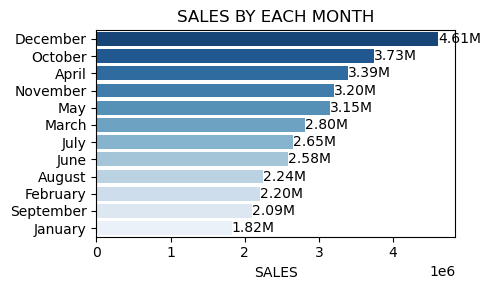

In [2]:
monthly_sales = data.groupby('Month_Name')['Total_Sales'].sum().to_frame().sort_values('Total_Sales',ascending = False)
plt.figure(figsize=(5,3))
ax = sns.barplot(x= monthly_sales['Total_Sales'],
            y=monthly_sales.index,
            hue=monthly_sales.index,
            palette= 'Blues_r')
for i in ax.patches:
    ax.text(i.get_width(),
            i.get_y() + i.get_height()/2,
            f'{i.get_width()/1000000:.2f}M', ha = 'left', va ='center')

plt.xlabel('SALES')
plt.ylabel('')
plt.title('SALES BY EACH MONTH')
plt.tight_layout()
plt.show()


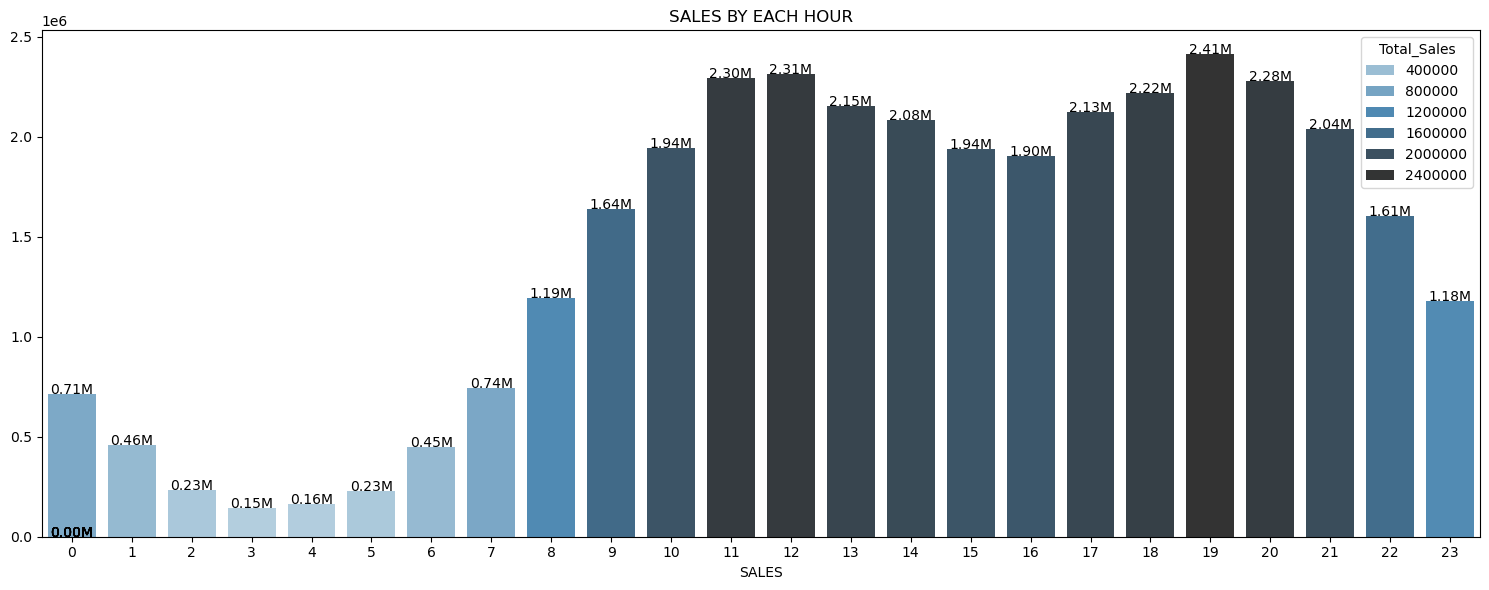

In [3]:
hourly_sales = data.groupby('Hour')['Total_Sales'].sum().to_frame()
hourly_sales.sort_values('Total_Sales', ascending= False)
plt.figure(figsize=(15,6))
ax = sns.barplot(y= hourly_sales['Total_Sales'],
                 hue= hourly_sales['Total_Sales'],
            x=hourly_sales.index,
            
            palette= 'Blues_d')
for i in ax.patches:
    ax.text( i.get_x() + i.get_width()/2, i.get_height(),
            f'{i.get_height()/1000000:.2f}M', ha = 'center', va ='baseline')


plt.xlabel('SALES')
plt.ylabel('')
plt.title('SALES BY EACH HOUR')
plt.tight_layout()
plt.show()

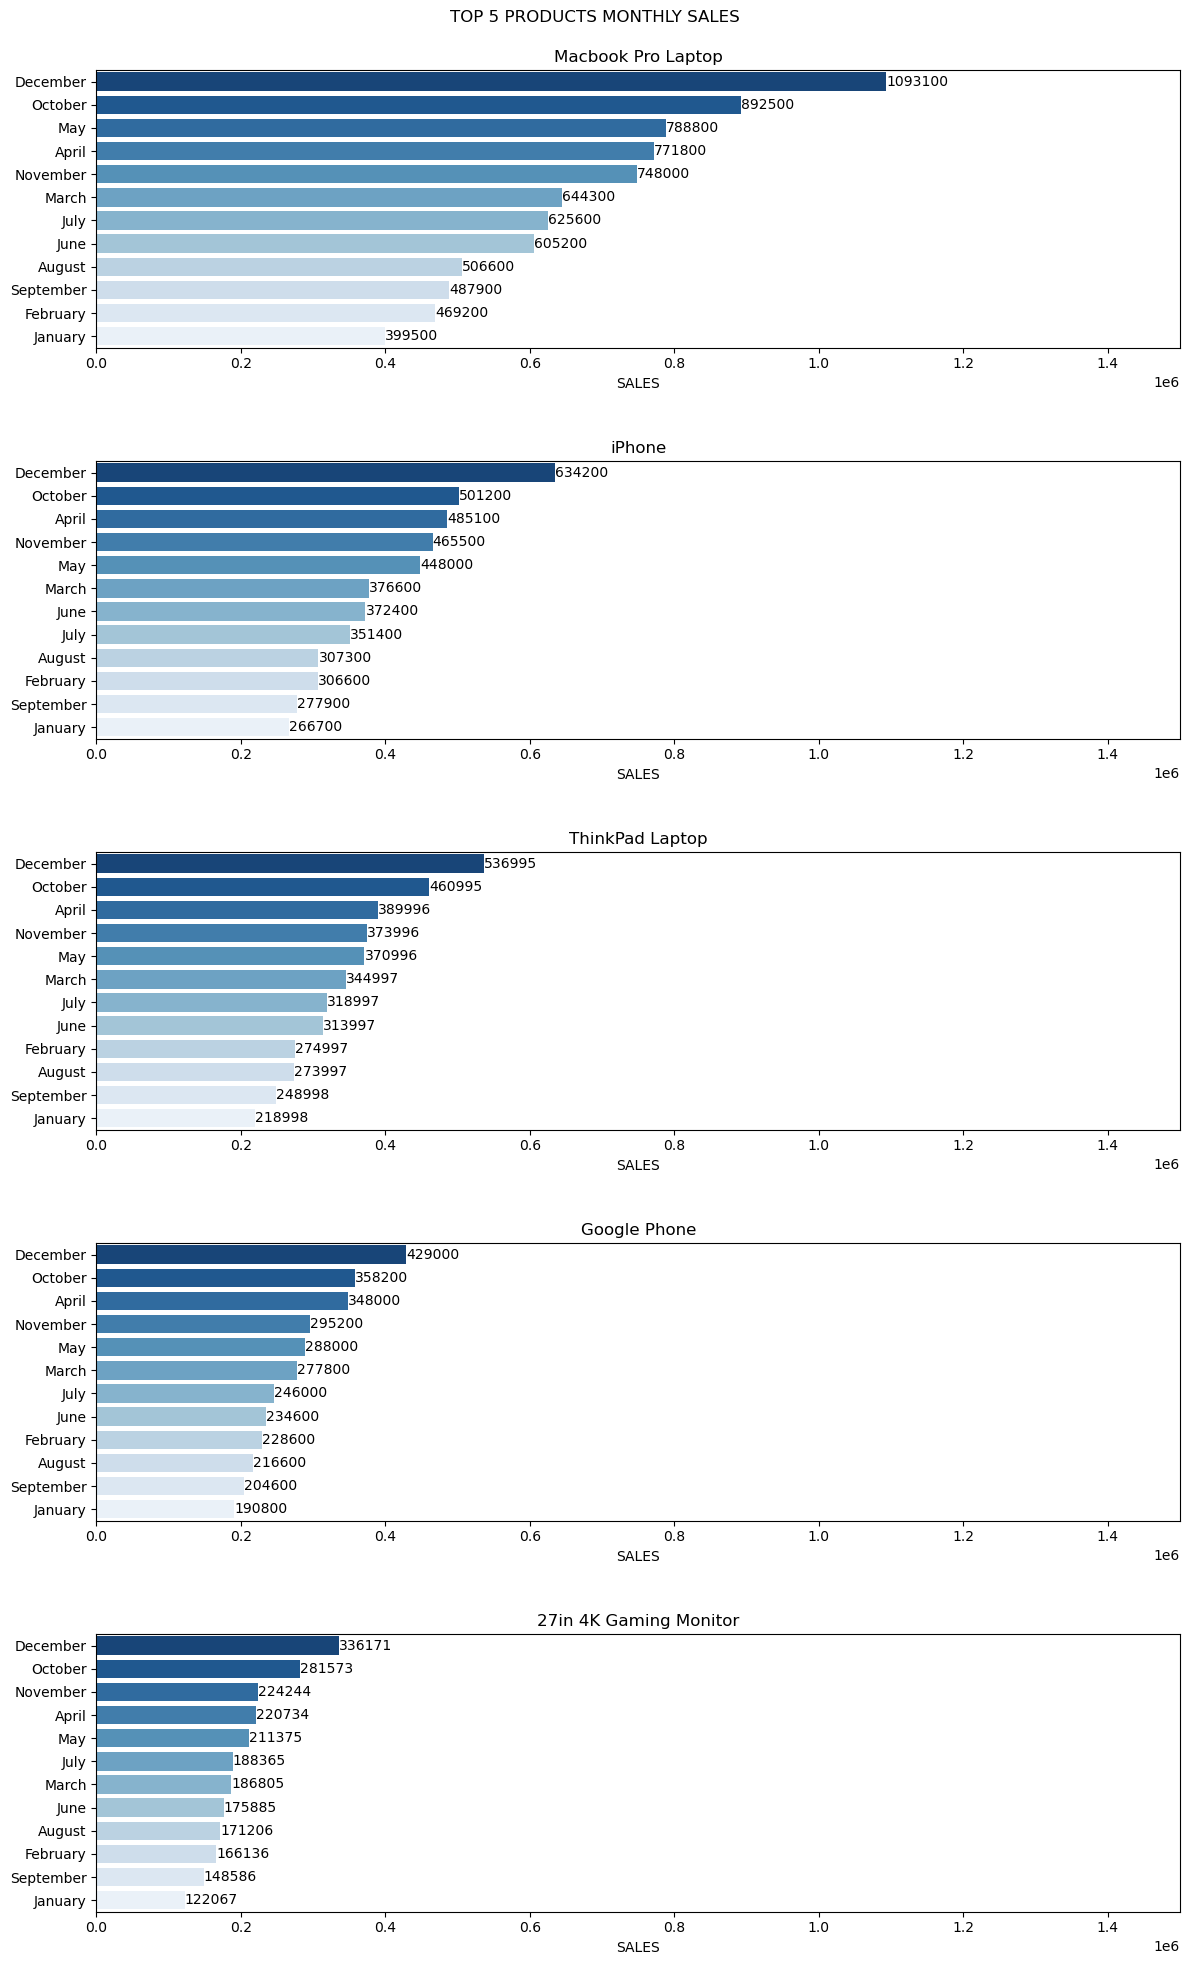

In [4]:
monthly_sales_pivot = data.pivot_table(values= 'Total_Sales',
                 index= ['Month', 'Month_Name'],
                 columns = 'Product',
                 aggfunc = 'sum')
monthly_sales_pivot = monthly_sales_pivot.reset_index()
monthly_sales_pivot= monthly_sales_pivot.drop('Month', axis=1)
monthly_sales_pivot = monthly_sales_pivot.set_index('Month_Name')

monthly_sales_pivot.loc['Total'] = monthly_sales_pivot.sum()
monthly_sales_pivot = monthly_sales_pivot.T.sort_values('Total', ascending= False).T
monthly_sales_pivot = monthly_sales_pivot.drop('Total')

top5_products = monthly_sales_pivot.columns.values.tolist()[0:5]
fig, ax = plt.subplots(len(top5_products),1,figsize=(12,20))
for i,val in enumerate(top5_products):
    srt = monthly_sales_pivot[val].sort_values(ascending = False).reset_index()
    sns.barplot(x= srt[val],
                y= srt['Month_Name'],
                hue= srt['Month_Name'],
                
                palette= 'Blues_r',
                ax= ax[i])
    for index,value in enumerate(srt[val]):
        ax[i].text(value, index, f'{value:.0f}', ha = 'left', va = 'center')
    ax[i].set_title(f'\n\n{top5_products[i]}')
    ax[i].set_xlabel('SALES')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,1500000)
plt.suptitle('TOP 5 PRODUCTS MONTHLY SALES')
plt.tight_layout()
plt.show()

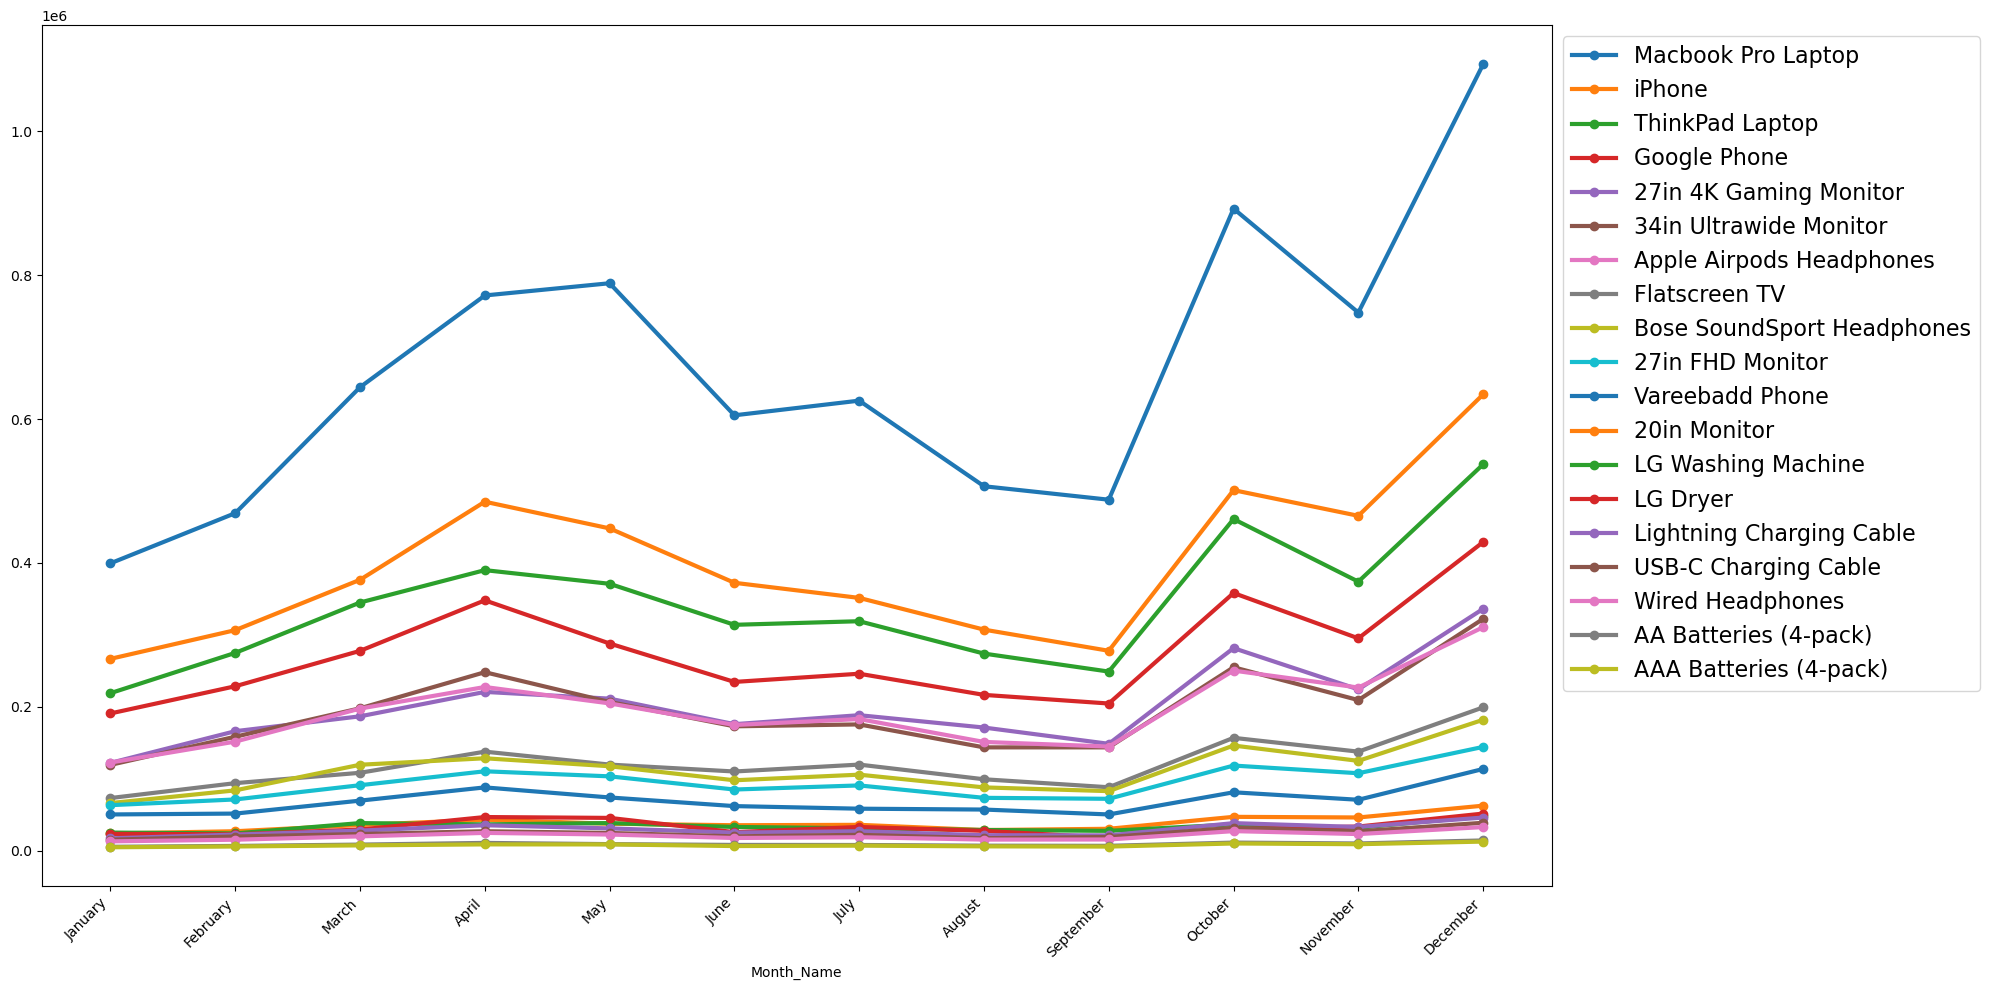

In [28]:

#can do it with line plot but its visually not so good


ax = monthly_sales_pivot.plot(kind='line', figsize=(20, 10),
                              linestyle = "-",
                              marker = 'o',
                              linewidth = 3)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 16)
ax.set_xticks(range(len(monthly_sales_pivot.index)), labels= monthly_sales_pivot.index, rotation = 45, ha='right')
plt.xticks(range(12))
plt.tight_layout()
plt.show()

